<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Regularisation – data scaling
© ExploreAI Academy

In this notebook, we'll gain a comprehensive understanding of scaling and how to implement it in your models.

## Learning objectives

By the end of this notebook, you should be able to:
- Understand what scaling and standardisation are.
- Understand the code required to implement data scaling.

## Introducing scaling

Scaling data is crucial when preparing it for machine learning models, especially for those that involve regularisation. Regularisation techniques, such as L1 (Lasso) and L2 (Ridge) regularisation, adjust model complexity by applying penalties to the coefficients of predictors. The magnitude of these penalties is influenced by the scale of the predictors, making scaling an essential step to ensure fairness and effectiveness in regularisation. Essentially, if the features are on different scales, the model might unfairly penalise smaller-scale features more than those on a larger scale. Therefore, to apply regularisation uniformly across all features, we must standardise their scales.

There are two common scaling techniques:

### Normalisation

One way to do this is with $[0,1]$-normalisation, otherwise known as min-max normalisation: squeezing your data into the range $[0,1]$. Through normalisation, the maximum value of a variable becomes one, the minimum becomes zero, and the values in between become decimals between zero and one.

We implement this transformation by applying the following operation to each of the values of a predictor variable:

$$\hat{x}_{ij} = \frac{x_{ij}-min(x_j)}{max(x_j)-min(x_j)},$$

where $\hat{x}_{ij}$ is the value after normalisation, $x_{ij}$ is the $i^{th}$ item of $x_j$, and $min()$, $max()$ return the smallest and largest values of variable $x_j$ respectively. 

Normalisation is useful because it ensures all variables share the same range: $[0,1]$. One problem with normalisation, however, is that if there are outliers, the bulk of your data will all lie in a small range, so you will lose information.

### Standardisation

Z-score standardisation, or simply standardisation, on the other hand, does not suffer from this drawback as it handles outliers gracefully. 

We implement Z-score standardisation by applying the following operation to each of our variables: 

$$\hat{x}_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}.$$

Here, $\mu_j$ represents the mean of variable $x_j$, while $\sigma_j$ is the variable's standard deviation. As can be seen from the above formula, instead of dividing by the full range of our variable, we instead divide by a more distribution-aware measure in the standard deviation. While this doesn't completely remove the effects of outliers, it does consider them in a more conservative manner. As a trade-off to using this transformation, our variable is no longer contained within the $[0,1]$ range as it was during normalisation (in fact, it can now take on a range which includes negative values). This means that all our variables won't be bound to the exact same range (i.e. they can have slightly different influence levels on the learned regression coefficients during regularisation), but they are far closer to one another than they were before the use of standardisation.

## Getting started

To begin, let's import a few Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Now we'll load our data as a Pandas DataFrame after fetching it from the GitHub repo.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv', index_col=0)
df.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
Year,,,,,,,,,,,,,,,,
2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345


We can take a look at the dimensions of the DataFrame to get an idea of the number of rows, _n_, and number of predictors, _p_, which is equal to one less than the number of columns.

In [3]:
df.shape

(1000, 16)

Our dataset contains various environmental indicators related to SDG 15, such as deforestation rates, protected area coverage, biodiversity indices, and other relevant variables. Our objective is to model an environmental outcome for  the health of biodiversity using these indicators. 

The mathematical representation of our model can be described as follows:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$

In this formulation, $Y$ represents the response variable, which in our case is `BiodiversityHealthIndex`. This response variable is influenced by _p_ predictor variables ($X_1, X_2, ..., X_p$), each representing different environmental indicators relevant to SDG 15.

We can see in the data above that the variables have different scales. For example, variables such as `ConservationFunding` may involve financial values potentially reaching into high numerical ranges, whereas other variables like `ProtectedAreaCoverage` or `RenewableEnergyUsage` are expressed as percentages. So let's go ahead and implement scaling. 

## Implementing scaling

Let's see how we standardise the features. Sklearn makes rescaling easy. We'll import the `StandardScaler()` object from `sklearn.preprocessing`.

In [4]:
# split data into predictors and response
X = df.drop('BiodiversityHealthIndex', axis=1)
y = df['BiodiversityHealthIndex']

In [5]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [6]:
# create scaler object
scaler = StandardScaler()

In [7]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [8]:
# convert the scaled predictor values into a DataFrame
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,-0.509823,0.915895,0.532798,0.967295,-0.129430,-1.297085,0.017923,0.689812,-0.641157,-1.290990,-0.930835,-1.237558,-1.131411,1.494660,-0.811078
1,-1.261473,-1.159761,0.479063,1.382383,-1.098165,1.226669,-1.649745,0.655167,0.539995,0.207271,0.470716,-0.670150,0.305779,-0.107952,0.797582
2,-1.363971,-1.409483,1.389846,0.206299,0.320340,-0.529103,-0.877370,0.759101,1.165311,-0.473757,-0.110415,1.006319,1.598836,-1.017291,-1.518029
3,-0.475658,0.746916,0.684528,0.828932,1.323673,1.653728,1.188117,0.481943,1.165311,1.535274,0.368164,-1.360736,0.001642,-0.978326,-1.249998
4,-0.885648,1.230038,-0.213905,1.105658,1.323673,1.445945,-0.439815,-1.319584,-1.787570,1.160709,0.402348,1.675792,-0.977884,0.832482,1.077254


Taking a look at one of the variables as an example (`SoilQualityIndex`), we can see that standardising the data has caused it to be centred around zero.

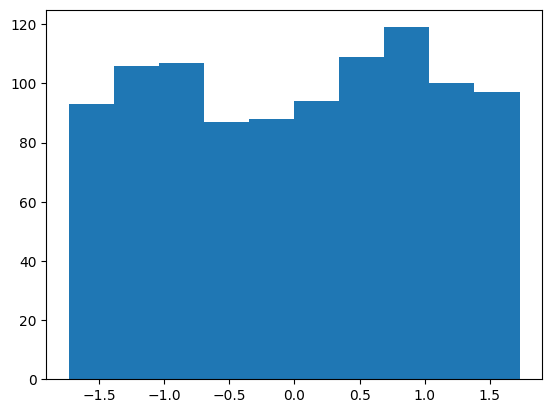

In [9]:
plt.hist(X_standardise['SoilQualityIndex'])
plt.show()

Furthermore, the standard error within each variable in the data is now equal to one. 

In [10]:
X_standardise.describe().loc['std']

WaterQualityIndex               1.0005
ClimateChangeImpactScore        1.0005
LandUseChange                   1.0005
InvasiveSpeciesCount            1.0005
ConservationFunding             1.0005
EcoTourismImpact                1.0005
ForestCoverChange               1.0005
SoilQualityIndex                1.0005
WaterUsage                      1.0005
RenewableEnergyUsage            1.0005
CarbonEmissionLevels            1.0005
AgriculturalIntensity           1.0005
HabitatConnectivity             1.0005
SpeciesReintroductionEfforts    1.0005
PollinatorDiversity             1.0005
Name: std, dtype: float64

## Implementing min-max normalisation

Let's see how we normalise the features. Sklearn makes rescaling easy. We'll import the `MinMaxScaler()` object from `sklearn.preprocessing`.

In [11]:
# import scaler method from sklearn
from sklearn.preprocessing import MinMaxScaler

In [12]:
# create scaler object
scaler = MinMaxScaler()

In [13]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [14]:
# convert the scaled predictor values into a DataFrame
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity
0,0.35,0.756418,0.663048,0.78,0.46,0.119325,0.501538,0.70,0.33,0.13,0.22,0.141846,0.166341,0.931904,0.270616
1,0.13,0.162080,0.647743,0.90,0.18,0.849463,0.015804,0.69,0.67,0.57,0.63,0.304904,0.581314,0.469659,0.730607
2,0.10,0.090575,0.907161,0.56,0.59,0.341507,0.240770,0.72,0.85,0.37,0.46,0.786679,0.954671,0.207377,0.068465
3,0.36,0.708033,0.706265,0.74,0.88,0.973014,0.842375,0.64,0.85,0.96,0.60,0.106448,0.493498,0.218615,0.145108
4,0.24,0.846369,0.450364,0.82,0.88,0.912901,0.368214,0.12,0.00,0.85,0.61,0.979068,0.210670,0.740911,0.810579


Taking a look at one of the variables as an example (`SoilQualityIndex`), we can see that normalising the data put it neatly between 0 and 1.

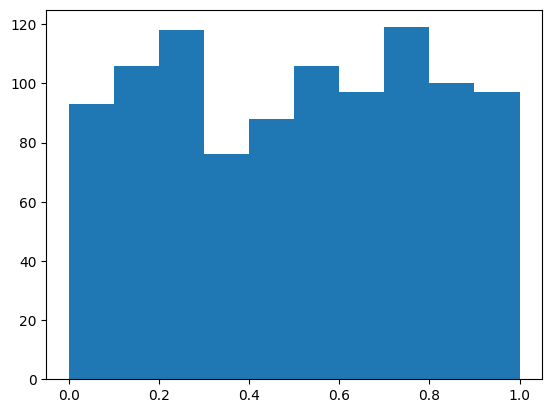

In [15]:
plt.hist(X_standardise['SoilQualityIndex'])
plt.show()

Furthermore, the standard error for these newly normalised variables is all relatively similar at +-0.28.

In [16]:
X_standardise.describe().loc['std']

WaterQualityIndex               0.292836
ClimateChangeImpactScore        0.286481
LandUseChange                   0.284973
InvasiveSpeciesCount            0.289240
ConservationFunding             0.289181
EcoTourismImpact                0.289451
ForestCoverChange               0.291411
SoilQualityIndex                0.288788
WaterUsage                      0.287999
RenewableEnergyUsage            0.293821
CarbonEmissionLevels            0.292679
AgriculturalIntensity           0.287518
HabitatConnectivity             0.288884
SpeciesReintroductionEfforts    0.288577
PollinatorDiversity             0.286090
Name: std, dtype: float64

## Conclusion

In this train, we have seen or been introduced to:

- The difference between scaling and standardising the predictor variables in our dataset.
- The different scaling techniques and performed scaling on our data using standardisation and normalisation. 

## Appendix
Links to additional resources to help with the understanding of concepts presented in the train.

- [Article on standard min-max normalization vs z-score standardisation](https://www.codecademy.com/articles/normalization)

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>